[Sumber data Daegu Apartment](https://www.kaggle.com/datasets/gunhee/koreahousedata) 

### **Contents**

- Business Problem Understanding
- Data Understanding
- Data Preprocessing
- Modelling
- Conclusion
- Rekomendation

****

# **Business Problem Understanding**

**Context**

Apartments are one of the answers to the housing needs of modern society due to limited residential land and dense business activities in urban areas. Therefore, it will be very interesting to examine apartment prices influenced by various internal and external factors. 

Individuals or companies usually make apartment (unit) offers. Bidders can sell units on a platform by determining their apartments’ prices. That way is quite difficult for apartment owners to adjust to market prices. If the price is too high compared to the market price, it will certainly be difficult to make sales. Conversely, if it is too low, the owner will find it difficult to get maximum profit.


**Problem Statement**

The challenge in this business is determining the appropriate selling price for an apartment with specific facilities and features in Daegu City. Therefore, a suitable model is needed to address the problem of determining the selling price of apartments, ensuring profitability for property owners and real estate agents. Additionally, it is important to maintain fair pricing in the area, avoiding significant differences between one apartment and another.


**Goals**

In this scenario, i'm as a real estate agents data Scientist will provide model to team Sales for a predictive tool to help sales team to explain to homeowners / potential buyers determine the optimal selling/buying price of their properties.

**Analytic Approach**

Our objective is to analyze the data and uncover patterns within the available features that distinguish one apartment from another. Subsequently, we will develop a model to provide real estate agents with a new "price prediction tool" for recently listed apartments. This tool will be invaluable for homeowners / buyers seeking guidance in setting the optimal selling/buying price for apartments. And this model also can give estimated price to propective buyers.

**Metric Evaluation**

Among the commonly used evaluation metrics for prediction, such as MAE, RMSE, and MAPE, this time I have chosen to use MAE (Mean Absolute Error). MAE represents the average absolute difference between the predicted and actual values. The lower the MAE value, the more accurate the model is in predicting rental prices within the limitations of the features used.

## **Data Understanding**

- The dataset represents apartment transaction data from 1978 to 2015 in Daebong, Daegu, South Korea.
- Each data row represents information related to the condition of the apartment up to the selling price of the apartment.
- The dataset consists of 4123 rows and 11 columns.

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| HallwayType | Object | 	Type of hallway entrance to the apartment  |
| TimeToSubway | Object | 	Time required to reach the nearest Subway Station (min) |
| SubwayStation | Object | Name of the nearest Subway Station |
| N_FacilitiesNearBy(ETC) | Float | Number of facilities near the apartment such as hotels, special needs schools |
| N_FacilitiesNearBy(PublicOffice) | Float | Number of Public Office facilities near the apartment |
| N_SchoolNearBy(University) | Float | Number of Universities near the apartment |
| N_Parkinglot(Basement) | Float | Number of basement parking lots |
| YearBuilt | Integer | Year the apartment was built |
| N_FacilitiesInApt | Integer | Number of facilities for residents such as swimming pool, gym, playground |
| Size(sqf) | Integer | Apartment size in square feet |
| SalePrice | Integer | Apartment price (USD) |


<br>

In [1]:
# Import library yang dibutuhkan untuk eksplorasi dataset
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
df = pd.read_csv('data_daegu_apartment.csv')
df.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       4123 non-null   object 
 1   TimeToSubway                      4123 non-null   object 
 2   SubwayStation                     4123 non-null   object 
 3   N_FacilitiesNearBy(ETC)           4123 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  4123 non-null   float64
 5   N_SchoolNearBy(University)        4123 non-null   float64
 6   N_Parkinglot(Basement)            4123 non-null   float64
 7   YearBuilt                         4123 non-null   int64  
 8   N_FacilitiesInApt                 4123 non-null   int64  
 9   Size(sqf)                         4123 non-null   int64  
 10  SalePrice                         4123 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 354.4+ KB


## **Exploratory Data Analysis**

**Distribution of Daegu Apartment SalePrice**

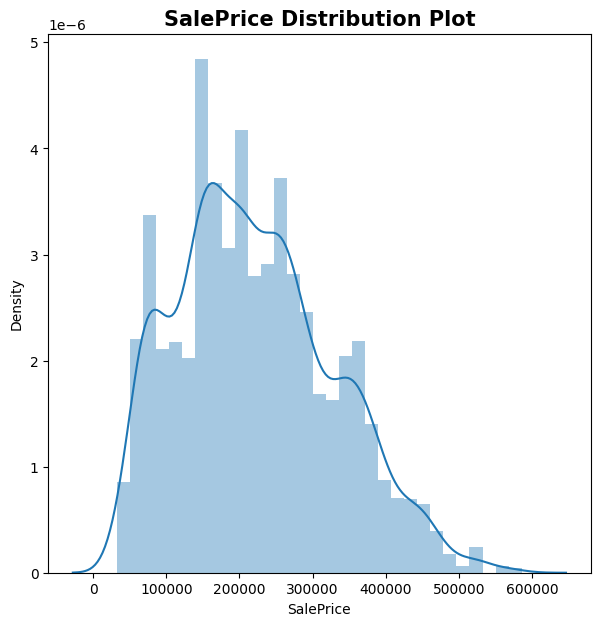

In [4]:
# Plot distribusi fitur 'SalePrice'
plt.figure(figsize=(7, 7))
sns.distplot(df['SalePrice'])
plt.title('SalePrice Distribution Plot', size=15, weight='bold');
plt.savefig('SalePrice Distribution Plot.jpg')

In [5]:
from scipy.stats import shapiro

stat, p_value = shapiro(df['SalePrice'])
print('Statistic:', stat)
print('p-value:', p_value)

if p_value > 0.05:
    print('Data Saleprice Distribution is Normal')
else:
    print('Data Saleprice Distribution is not Normal')

Statistic: 0.9755797982215881
p-value: 5.1462305657808854e-26
Data Saleprice Distribution is not Normal


Based on apartment price distribution plot above, it can be seen that there is a 'right-skewed distribution'. In other words, there is a positive skew in the SalePrice feature.

**HallwayType dan YearBuilt**

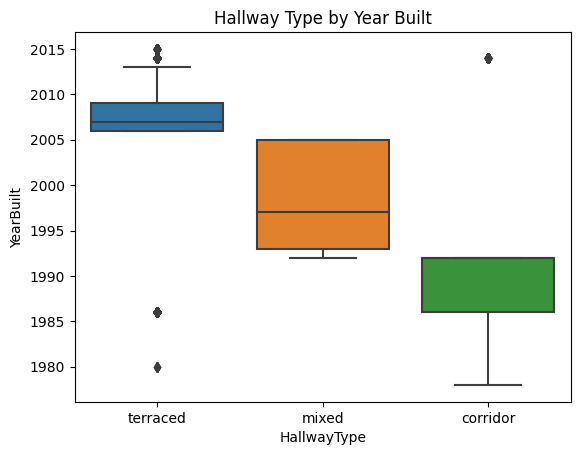

In [6]:
sns.boxplot(x='HallwayType', y='YearBuilt', data=df)
plt.title('Hallway Type by Year Built')
plt.savefig('Hallway Type by Year Built.jpg')

Based on the boxplot above, before 1993 most apartments used corridor hallways. In between 1992 to 2005, apartments mostly use mixed Hallway Type. And in 2006 to 2015 apartements mostly use terraced Hallway Type

In [7]:
terraced = df['YearBuilt'][df['HallwayType']=='terraced'].reset_index()
terraced.drop(columns='index',inplace=True)
terraced.head()

print(f'terraced max year = {terraced.max()}')
print(f'terraced min year = {terraced.min()}')
print(f'terraced q1 = {np.quantile(terraced, 0.25)}')

terraced max year = YearBuilt    2015
dtype: int64
terraced min year = YearBuilt    1980
dtype: int64
terraced q1 = 2006.0


In [8]:
mixed = df['YearBuilt'][df['HallwayType']=='mixed'].reset_index()
mixed.drop(columns='index',inplace=True)
mixed.head()

print(f'corridor max year = {mixed.max()}')
print(f'corridor min year = {mixed.min()}')
print(f'mixed q3 = {np.quantile(mixed, 0.75)}')

corridor max year = YearBuilt    2005
dtype: int64
corridor min year = YearBuilt    1992
dtype: int64
mixed q3 = 2005.0


In [9]:
corridor = df['YearBuilt'][df['HallwayType']=='corridor'].reset_index()
corridor.drop(columns='index',inplace=True)
corridor.head()

print(f'corridor max year = {corridor.max()}')
print(f'corridor min year = {corridor.min()}')
print(f'corridor q3 = {np.quantile(corridor, 0.75)}')

corridor max year = YearBuilt    2014
dtype: int64
corridor min year = YearBuilt    1978
dtype: int64
corridor q3 = 1992.0


In [10]:
time_subway = df['TimeToSubway'].value_counts().reset_index()
time_subway

,TimeToSubway,count
0,0-5min,1953
1,5min~10min,787
2,15min~20min,629
3,10min~15min,583
4,no_bus_stop_nearby,171


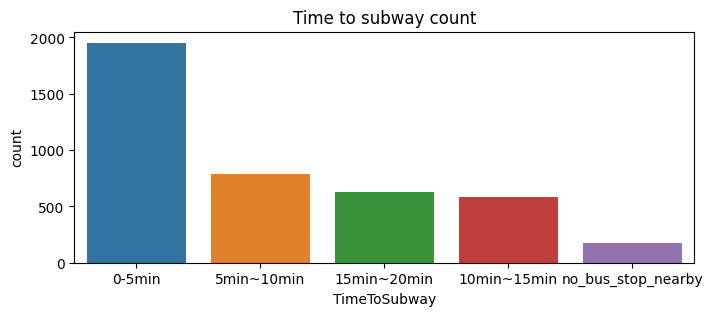

In [11]:
plt.figure(figsize=(8,3))
sns.barplot(data=time_subway, x='TimeToSubway', y='count')
plt.title('Time to subway count')
plt.savefig('Time to subway count.jpg')

We can see that most apartment is build near to subway

In [12]:
df_harga = df.groupby('HallwayType').agg({'SalePrice':np.median}).reset_index()
df_harga

,HallwayType,SalePrice
0,corridor,74557.0
1,mixed,153539.0
2,terraced,264601.0


In [13]:
df['TimeToSubway'].value_counts()

TimeToSubway
0-5min                1953
5min~10min             787
15min~20min            629
10min~15min            583
no_bus_stop_nearby     171
Name: count, dtype: int64

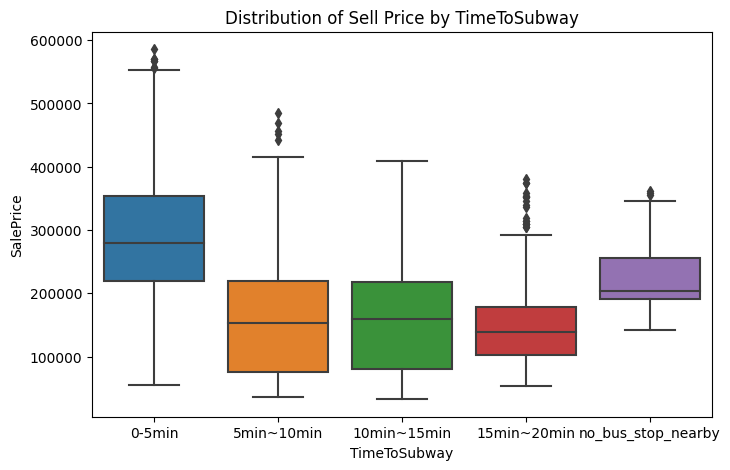

In [14]:
plt.figure(figsize=(8,5))
sns.boxplot(data = df, y='SalePrice', x='TimeToSubway',order=["0-5min", "5min~10min", "10min~15min", "15min~20min","no_bus_stop_nearby"])
plt.title('Distribution of Sell Price by TimeToSubway')
plt.savefig('Distribution of Sell Price by TimeToSubway.jpg')

From boxplot above, we can know that time to subway make the variative Apartment Price.

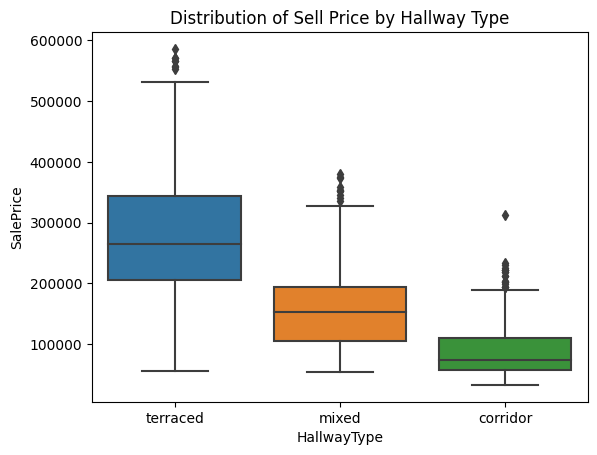

In [15]:
sns.boxplot(data = df, y='SalePrice', x='HallwayType')
plt.title('Distribution of Sell Price by Hallway Type')
plt.savefig('Distribution of Sell Price by Hallway Type.jpg')

From the chart above, we can know that Hallway Type is influence to Saleprice.

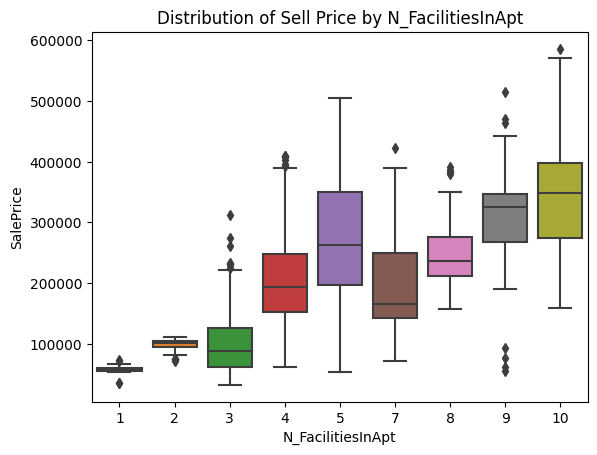

In [16]:
sns.boxplot(data = df, y='SalePrice', x='N_FacilitiesInApt')
plt.title('Distribution of Sell Price by N_FacilitiesInApt')
plt.savefig('Distribution of Sell Price by N_FacilitiesInApt.jpg')

From the chart above, there are so many facilities in each apartment. But we can see in major that more facilities in Apartment so more higher Saleprice.

# **Data Preprocessing**

At this stage, cleaning will be carried out on the data which later we will use the cleaned data for the next analysis process.

In [17]:
# Cek detail information for any feature
check_unique = []

for col in df.columns:
    check_unique.append([col, df[col].dtype, df[col].isna().sum(), df[col].nunique(), list(df[col].drop_duplicates().sample(3).values)])

df_unique= pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=check_unique)
df_unique

,dataFeatures,dataType,null,unique,uniqueSample
0,HallwayType,object,0,3,"[corridor, terraced, mixed]"
1,TimeToSubway,object,0,5,"[5min~10min, no_bus_stop_nearby, 0-5min]"
2,SubwayStation,object,0,8,"[Banwoldang, Sin-nam, Chil-sung-market]"
3,N_FacilitiesNearBy(ETC),float64,0,4,"[5.0, 0.0, 1.0]"
4,N_FacilitiesNearBy(PublicOffice),float64,0,8,"[5.0, 3.0, 2.0]"
5,N_SchoolNearBy(University),float64,0,6,"[3.0, 0.0, 5.0]"
6,N_Parkinglot(Basement),float64,0,20,"[798.0, 605.0, 524.0]"
7,YearBuilt,int64,0,16,"[2014, 2005, 1992]"
8,N_FacilitiesInApt,int64,0,9,"[3, 4, 10]"
9,Size(sqf),int64,0,89,"[156, 1288, 572]"


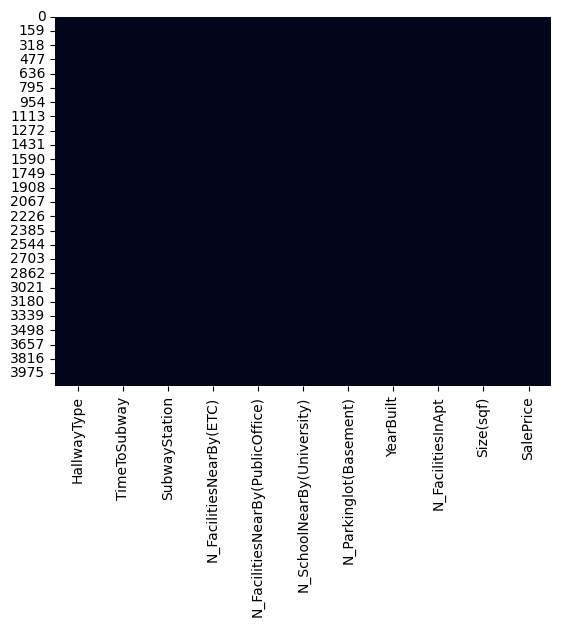

In [18]:
# Missing value heatmap
sns.heatmap(df.isnull(), cbar=False)
plt.savefig('Missing Value.jpg',bbox_inches='tight')

Based on image above, there are not found missing value in every feature.

In [19]:
print(f'Sum of duplicate data is = {df.duplicated().sum()}')

Sum of duplicate data is = 1422


In [20]:
df[df.duplicated(keep='first')]

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
55,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,910,263345
56,terraced,0-5min,Banwoldang,0.0,0.0,0.0,203.0,2014,10,914,371681
122,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,644,149274
127,terraced,0-5min,Banwoldang,0.0,2.0,2.0,524.0,2007,4,1394,256637
133,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,644,168141
...,...,...,...,...,...,...,...,...,...,...,...
4113,terraced,5min~10min,Daegu,0.0,3.0,2.0,400.0,2015,7,644,300884
4114,corridor,10min~15min,Myung-duk,5.0,7.0,5.0,0.0,1992,3,355,86725
4115,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,168141
4120,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,168141


In [21]:
df = df.drop_duplicates()

In [22]:
print(f'Total Data before remove duplicate = 4123')
print(f'Total Data after remove duplicate = {len(df)}')

Total Data before remove duplicate = 4123
Total Data after remove duplicate = 2701


**Drop Column**

No Columns need to be dropped, as all columns are related to the target column.

In [23]:
df.describe()

,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
count,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000
mean,1.890411,4.027027,2.680489,533.746390,2002.358386,5.713439,984.028878,229511.365790
std,2.153168,1.887486,1.504470,418.224859,9.151949,2.386552,391.982619,105079.891321
min,0.000000,0.000000,0.000000,0.000000,1978.000000,1.000000,135.000000,32743.000000
25%,0.000000,3.000000,2.000000,181.000000,1993.000000,4.000000,743.000000,153539.000000
50%,1.000000,4.000000,2.000000,536.000000,2006.000000,5.000000,910.000000,221238.000000
75%,5.000000,5.000000,4.000000,798.000000,2007.000000,7.000000,1167.000000,300884.000000
max,5.000000,7.000000,5.000000,1321.000000,2015.000000,10.000000,2337.000000,585840.000000


From statistic descriptive above, we can see Apartement in daegu are built since 1978. Average size of the apartments are 984(sqf). The minimum Saleprice is 32743 and the maximum Saleprice is 585840 USD.

**Outliers Detection**

The number of outliers in the data will certainly affect the results of the analysis and modeling performed. There are several things that must be considered before deciding on the appropriate treatment for the data, including considering the domain knowledge.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2701 entries, 0 to 4121
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       2701 non-null   object 
 1   TimeToSubway                      2701 non-null   object 
 2   SubwayStation                     2701 non-null   object 
 3   N_FacilitiesNearBy(ETC)           2701 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  2701 non-null   float64
 5   N_SchoolNearBy(University)        2701 non-null   float64
 6   N_Parkinglot(Basement)            2701 non-null   float64
 7   YearBuilt                         2701 non-null   int64  
 8   N_FacilitiesInApt                 2701 non-null   int64  
 9   Size(sqf)                         2701 non-null   int64  
 10  SalePrice                         2701 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 253.2+ KB


In [25]:
numericals = [feature for feature in df.columns if(df[feature].dtype != 'O')]
categoricals = [feature for feature in df.columns if(df[feature].dtype == 'O')]

In [26]:
numericals

['N_FacilitiesNearBy(ETC)',
 'N_FacilitiesNearBy(PublicOffice)',
 'N_SchoolNearBy(University)',
 'N_Parkinglot(Basement)',
 'YearBuilt',
 'N_FacilitiesInApt',
 'Size(sqf)',
 'SalePrice']

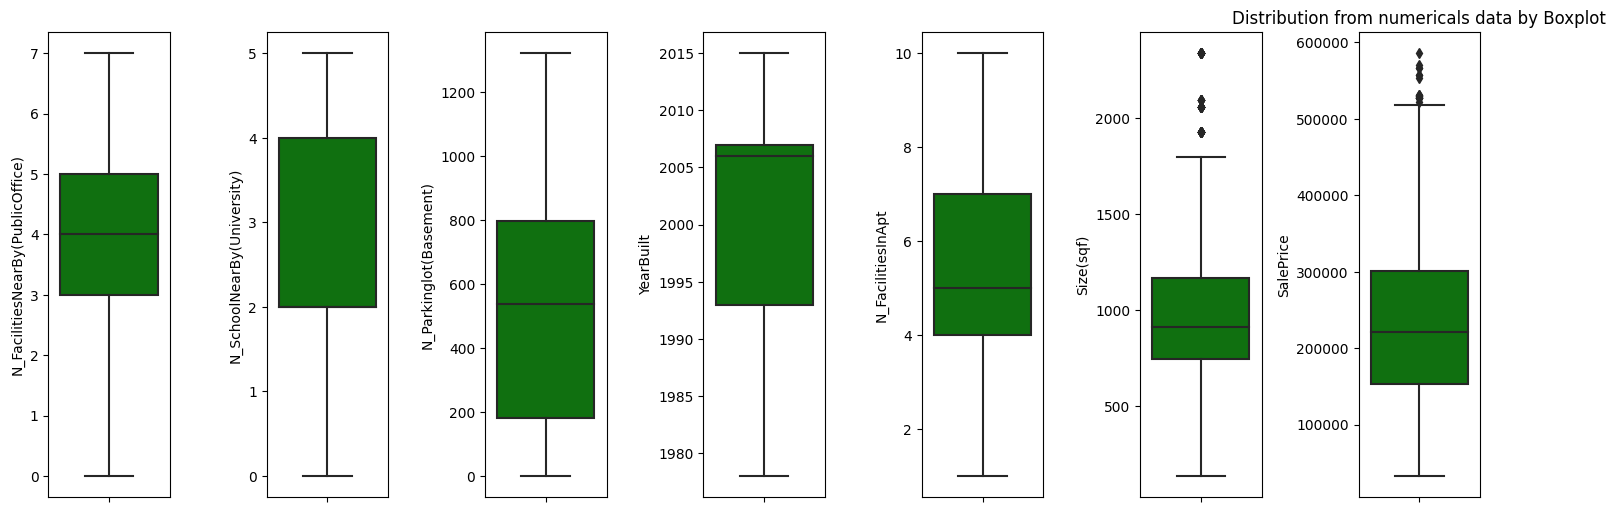

In [27]:
features = ['N_FacilitiesNearBy(PublicOffice)',
 'N_SchoolNearBy(University)',
 'N_Parkinglot(Basement)',
 'YearBuilt',
 'N_FacilitiesInApt',
 'Size(sqf)',
 'SalePrice']
plt.figure(figsize=(15,5))
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color = 'green', orient = 'v')
    plt.tight_layout()
plt.title('Distribution from numericals data by Boxplot')
plt.savefig('Distribution Numericals.jpeg')


Text(0.5, 1.0, 'Distribution from numericals data by Boxplot')

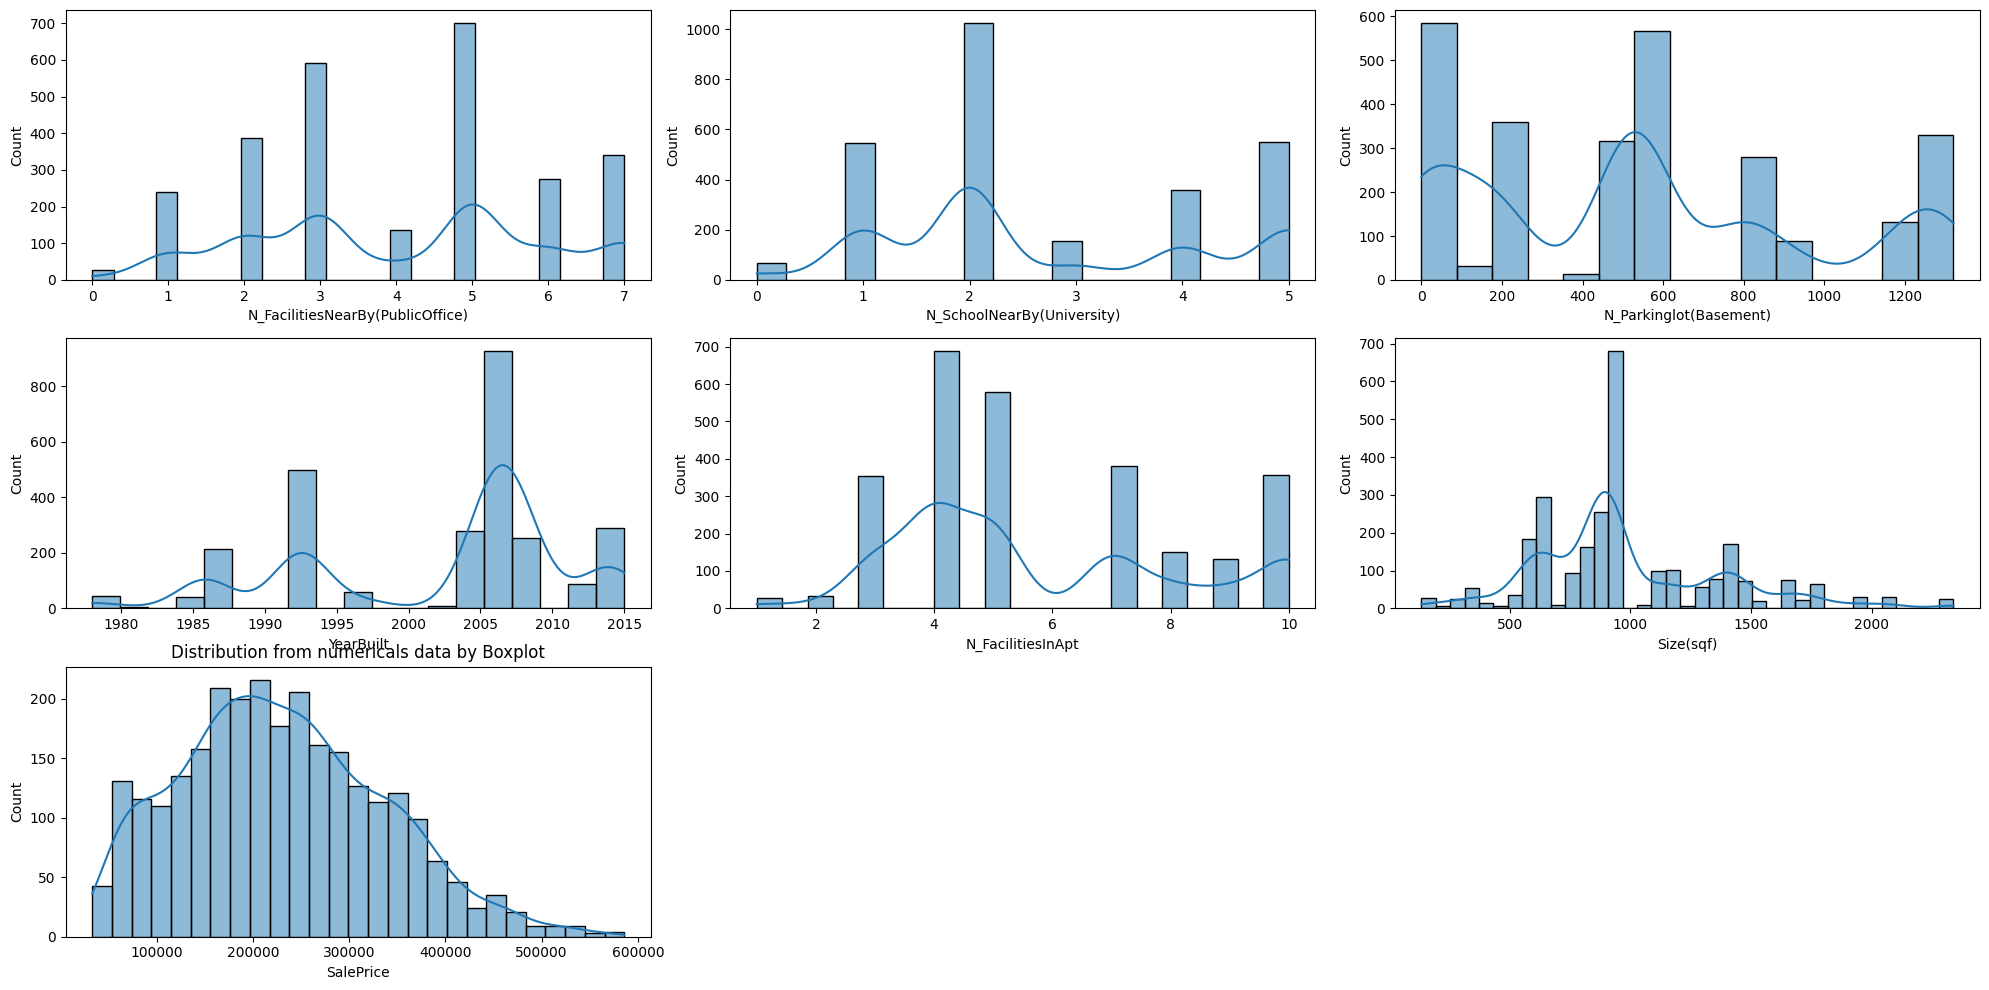

In [28]:
features = ['N_FacilitiesNearBy(PublicOffice)',
 'N_SchoolNearBy(University)',
 'N_Parkinglot(Basement)',
 'YearBuilt',
 'N_FacilitiesInApt',
 'Size(sqf)',
 'SalePrice']
plt.figure(figsize=(20,10))
for i in range(0, len(features)):
    plt.subplot(3,3, i+1)
    sns.histplot(df[features[i]],kde=True)
    plt.tight_layout()
plt.title('Distribution from numericals data by Boxplot')


Based on the boxplot above, the features that have outliers are SalePrice and Size(sqf). Daegu has apartments of various sizes. For example, on [[sell apartment size => 2334 SQF]](http://www.realtymyhome.com/contents/search.php?sfl24=&sfl1=Daegu&sfl2=&sfl4=2&sfl7=&sfl3=&sfl51=&sfl10=&sfl11=&sfl10=&sfl11=&sfl12=&sfl13=&sfl17=200&sfl18=&sfl19=&sfl20=&x=62&y=8), they sell an apartment with a size of 2464 sqft, which is larger than the sizes in this dataset. Therefore, we cannot drop the outliers because they reflect the actual facts. In the SalePrice column, we also do not drop the outliers because the price outliers are tightly distributed or there is not a large gap between the outliers, indicating that they represent the actual prices.

In [29]:
def outliers(data):
    lower_bound = data.quantile(0.01)
    upper_bound = data.quantile(0.99)    
    
    print(f'Above limit: {upper_bound}')
    print(f'Lower limit: {lower_bound}')

In [30]:
outliers(df['SalePrice'])

Above limit: 495575.0
Lower limit: 47787.0


In [31]:
outliers(df['Size(sqf)'])

Above limit: 2092.0
Lower limit: 192.0


In [32]:
df1 = df.copy()

In [33]:
df1.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504


**Data Correlation**

In [34]:
numeric_df = df.select_dtypes(include='number')
numeric_df.corr()

,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
N_FacilitiesNearBy(ETC),1.000000,0.720587,0.810447,0.006581,-0.245556,-0.136642,-0.294181,-0.393809
N_FacilitiesNearBy(PublicOffice),0.720587,1.000000,0.719350,-0.094297,-0.447792,-0.193143,-0.289023,-0.420233
N_SchoolNearBy(University),0.810447,0.719350,1.000000,0.156429,-0.176935,-0.051298,-0.237026,-0.308612
N_Parkinglot(Basement),0.006581,-0.094297,0.156429,1.000000,0.593779,0.836959,0.221931,0.557944
YearBuilt,-0.245556,-0.447792,-0.176935,0.593779,1.000000,0.593777,0.031542,0.502638
N_FacilitiesInApt,-0.136642,-0.193143,-0.051298,0.836959,0.593777,1.000000,0.162423,0.569403
Size(sqf),-0.294181,-0.289023,-0.237026,0.221931,0.031542,0.162423,1.000000,0.655673
SalePrice,-0.393809,-0.420233,-0.308612,0.557944,0.502638,0.569403,0.655673,1.000000


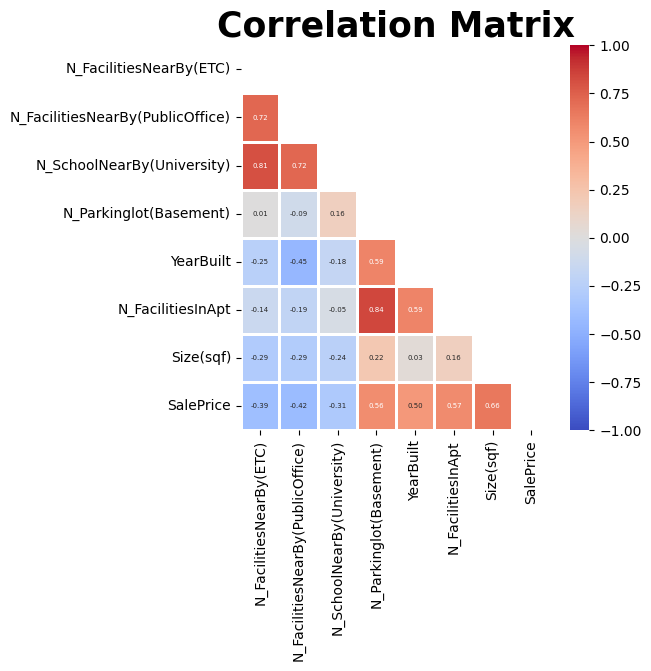

In [35]:
# Correlation Matrix
corr_matrix = numeric_df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(5,5))
sns.heatmap(corr_matrix, annot=True,linewidths=1,fmt='.2f',cmap='coolwarm',vmin=-1, vmax=1, mask=mask, annot_kws={'size':5})
plt.title('Correlation Matrix', size=25, weight='bold')
plt.savefig('Correaltion Matrix.jpg', bbox_inches='tight')

From the heatmap above, we can found the medium correlation between Saleprice are N_parkinglot, Yearbuilt, N_facilitesinAPT, and Size(sqf).

# **Modelling**

**Import Library Machine Learning**

In [36]:
# menyatukan beberapa tahap preprocessing atau fungsi lainnya
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# encoder dan scaler
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder, OrdinalEncoder
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer

# Model Selection & Tuning
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold, cross_validate

# Algoritma Modelling Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor
from lightgbm import LGBMRegressor


# Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

**Encoding**

- Perform encoding for each categorical feature.

In [37]:
df1

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504
...,...,...,...,...,...,...,...,...,...,...,...
4116,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,818,290265
4117,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,345132
4118,terraced,0-5min,Sin-nam,0.0,3.0,2.0,475.0,2008,8,914,323008
4119,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1451,242477


- HallwayType is encoded using OneHotEncoding since it only has 3 categories.
- SubwayStation is encoded using Binary Encoding because it has 8 categories.
- TimeToSubway is encoded using Ordinal Encoding since the data will be ordered, where higher score values indicate better categories.

In [38]:
ordinal_mapping = [
    {'col':'TimeToSubway', 'mapping':
        {'0-5min':4, '5min~10min':3, '10min~15min':2, '15min~20min':1, 'no_bus_stop_nearby':0,} }]

pipe_ordinal_scale = Pipeline([
    ('ordinal', OrdinalEncoder(cols=['TimeToSubway'], mapping=ordinal_mapping)),
    ('scaler', RobustScaler())
])
# Create the transformer
transformer = ColumnTransformer([
    ('robust', RobustScaler(),['N_FacilitiesNearBy(ETC)','N_FacilitiesNearBy(PublicOffice)', 'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)', 'YearBuilt', 'N_FacilitiesInApt', 'Size(sqf)'] ),
    ('OneHot', OneHotEncoder(drop='first'), ['HallwayType']),
    ('Binary', BinaryEncoder(), ['SubwayStation']),
    ('pipe_ordinal_scale', pipe_ordinal_scale, ['TimeToSubway'])
], remainder='passthrough')
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('robust', RobustScaler(),
                                 ['N_FacilitiesNearBy(ETC)',
                                  'N_FacilitiesNearBy(PublicOffice)',
                                  'N_SchoolNearBy(University)',
                                  'N_Parkinglot(Basement)', 'YearBuilt',
                                  'N_FacilitiesInApt', 'Size(sqf)']),
                                ('OneHot', OneHotEncoder(drop='first'),
                                 ['HallwayType']),
                                ('Binary', BinaryEncoder(), ['SubwayStation']),
                                ('pipe_ordinal_scale',
                                 Pipeline(steps=[('ordinal',
                                                  OrdinalEncoder(cols=['TimeToSubway'],
                                                                 mapping=[{'col': 'TimeToSubway',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': 0-5min                4
5min~10min            3
10min~15min           2
15min~20min           1
no_bus_stop_nearby    0
dtype: int64}])),
                                                 ('scaler', RobustScaler())]),
                                 ['TimeToSubway'])])

**Data Splitting**

- X = Features Column
- Y = Target Column

In [39]:
# Splitting data to be data independent and data dependent/target
X = df1.drop(['SalePrice'], axis=1)
y = df1['SalePrice']

**Train and Test Splitting**

- test_size = .25, The proportion of data to be used for testing = 25%.
- The remaining data will be used for training = 75%.

In [40]:
# Splitting data to data train and data test with proportion 75 : 25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Benchmark Model

In [41]:
# Define Algoritm to be use
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)
lgbm = LGBMRegressor(random_state=42)


# Data Scaling
scaler = RobustScaler()

# Algoritm Candidate
models = [lr, knn, dt, rf, xgb, lgbm]
metrics = {'mae': 'neg_mean_absolute_error',
           'mape':'neg_mean_absolute_percentage_error',
           'rmse':'neg_root_mean_squared_error'}
score_mae = []
score_mape = []
score_rmse = []


# looking for best algoritm based on MAE Value
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=42) # sum Fold

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])
    scores = cross_validate(estimator,X_train, y_train, cv=crossval, scoring=metrics)
    
    score_mae.append(abs(scores['test_mae'].mean()))
    score_mape.append(abs(scores['test_mape'].mean()))
    score_rmse.append(abs(scores['test_rmse'].mean()))



![Gambar teks editor VS Code](https://i.stack.imgur.com/1rKJF.png)

Use RobustScaler: 
- RobustScaler is a scaler that is resistant to outliers. This scaler uses methods such as medians and quartiles to transform data into a specific range.

Metrics measurement:
- MAE (Mean Absolute Error) measures the average absolute difference between predictions and actual values, without considering the direction of the differences.

- MAPE (Mean Absolute Percentage Error) measures the percentage difference between predictions and actual values, providing an indication of the relative percentage error in predictions.

- RMSE (Root Mean Square Error) measures the square root of the average of the squared differences between predictions and actual values, giving more weight to larger differences.

Choose Linear Regression, KNN Regressor, DecisionTree Regressor, Random Forest Regressor, XGBoost Regressor, and LGBM Regressor to find the best model to be used.

In [42]:

model_bench= pd.DataFrame({
    'model' : ['Linear', 'KNN', 'Decsion Tree', 'Random Forest', 'XGBoost','LGBM Regressor'],
    'MAE': score_mae,
    'MAPE': score_mape,
    'RMSE': score_rmse    
})   
model_bench.sort_values('MAE', ascending=True)

,model,MAE,MAPE,RMSE
2,Decsion Tree,36793.783123,0.189502,45658.591413
4,XGBoost,36816.916154,0.189754,45685.413717
3,Random Forest,36849.929911,0.190183,45717.063493
5,LGBM Regressor,37011.331196,0.191228,45826.812352
1,KNN,39004.363654,0.203405,49446.803655
0,Linear,42375.725805,0.219933,52389.060930



Based on the training results above, there are 4 algorithm models that have the best similiar values, namely DecisionTree,XGBoost, RandomForest, and LGBM Regressor. This can be seen from the significantly low value of Mean Absolute Error (MAE).

Choose MAE becasue: <br>
Because **MAE** (Mean Absolute Error): MAE is suitable for predicting apartment prices. MAE (Mean Absolute Error) is an evaluation metric that measures prediction errors by calculating the average of the absolute differences between predicted values and actual values.


---

# Predict to Test Set with the Benchmark Model

We will make predictions on the test set using the Random Forest, XGBoost, Decision Tree models and LGBM.

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

models = {
    'DecisionTree Regression Before Tuning': DecisionTreeRegressor(random_state=42),
    'RandomForest Regression Before Tuning': RandomForestRegressor(random_state=42),
    'XGBoost Regression Before Tuning': XGBRegressor(random_state=42),
    'LGBM Regression Before Tuning': LGBMRegressor(random_state=42)}

score_mae = []
score_mape = []
score_rmse = []

# Predict on test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
    ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_mae.append(mean_absolute_error(y_test, y_pred)) #Calculate MAE
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))  # Calculate MAPE
    score_rmse.append(mean_squared_error(y_test, y_pred, squared=False))  # Calculate RMSE

score_before_tuning = pd.DataFrame({
    'model': list(models.keys()),
    'MAE': score_mae,
    'MAPE': score_mape,
    'RMSE': score_rmse
})

print('Testing Result Before Tuning')
score_before_tuning.sort_values('MAE', ascending=True)


Testing Result Before Tuning


,model,MAE,MAPE,RMSE
3,LGBM Regression Before Tuning,38831.895503,0.195765,47852.900793
1,RandomForest Regression Before Tuning,39052.333906,0.197426,48125.141812
2,XGBoost Regression Before Tuning,39095.706268,0.197346,48299.482363
0,DecisionTree Regression Before Tuning,39188.868617,0.198920,48637.842951


The results of above testing show that the **LGBM** model has the lowest value, but the other algorithms do not have a significant difference. Therefore, I will proceed with performing Hyperparameter Tuning on all models above.

----------------------------------------------------------------------------------------

# Hyperparameter Tuning

- Measuring how well a model can generalize and how it compares to other models can be done using Cross Validation.
- To perform hyperparameter tuning, we will use Randomized Search CV to search for the best combination of hyperparameters within a defined search space. We will tune the hyperparameters for the Decision Tree, Random Forest, XGBoost models and LGBM Regressor.

**LGBM Regerssor**

In [44]:
hyperparam_space_lgbm = {
    'model__max_depth': list(range(1, 21)),
    'model__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'model__n_estimators': [50, 100, 200, 400],
    'model__num_leaves': [10, 20, 30, 40],
    'model__min_child_samples': [1, 3, 5, 10],
    'model__subsample': [0.5, 0.7, 0.9, 1.0],
    'model__colsample_bytree': [0.5, 0.7, 0.9, 1.0],
    'model__reg_alpha': [0.0, 0.1, 0.5, 1.0],
    'model__reg_lambda': [0.0, 0.1, 0.5, 1.0]
}

# Model with hyperparameter tuning
lgbm = LGBMRegressor(random_state=42)

# Create algorithm chains
estimator_lgbm = Pipeline([
    ('preprocessing', transformer),
    ('scaler', scaler),
    ('model', lgbm)
])

crossval = KFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparameter tuning
lgbm_tune = RandomizedSearchCV(
    estimator_lgbm,
    param_distributions=hyperparam_space_lgbm,
    n_iter=50,
    cv=crossval,
    scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'],
    n_jobs=-1,
    refit='neg_mean_absolute_error',
    random_state=42
)

# Fitting data training to looking for best parameter
lgbm_tune.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('robust',
                                                                               RobustScaler(),
                                                                               ['N_FacilitiesNearBy(ETC)',
                                                                                'N_FacilitiesNearBy(PublicOffice)',
                                                                                'N_SchoolNearBy(University)',
                                                                                'N_Parkinglot(Basement)',
                                                                                'YearBuilt',
                                                                                'N_FacilitiesInApt',
                                                                                'Size(sqf...
                                        'model__min_child_samples': [1, 3, 5,
                                                                     10],
                                        'model__n_estimators': [50, 100, 200,
                                                                400],
                                        'model__num_leaves': [10, 20, 30, 40],
                                        'model__reg_alpha': [0.0, 0.1, 0.5,
                                                             1.0],
                                        'model__reg_lambda': [0.0, 0.1, 0.5,
                                                              1.0],
                                        'model__subsample': [0.5, 0.7, 0.9,
                                                             1.0]},
                   random_state=42, refit='neg_mean_absolute_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [45]:
print('LGBM Regressor')
print('Best_score:', lgbm_tune.best_score_)
print('Best_params:', lgbm_tune.best_params_)

LGBM Regressor
Best_score: -36737.637484937775
Best_params: {'model__subsample': 0.7, 'model__reg_lambda': 0.0, 'model__reg_alpha': 0.0, 'model__num_leaves': 10, 'model__n_estimators': 400, 'model__min_child_samples': 1, 'model__max_depth': 13, 'model__learning_rate': 0.05, 'model__colsample_bytree': 0.9}


**Decision Tree**

In [46]:
# hyperparameter space Decision Tree

hyperparam_space_dt = {
    'model__max_depth': list(range(1, 21)),            # Kedalaman pohon
    'model__max_features': list(range(1, 6)),          # Jumlah feature untuk tiap splitting
    'model__min_samples_split': list(range(2, 20)),    # Jumlah sample sebelum splitting
    'model__min_samples_leaf': list(range(2, 10)),     # Jumlah sample sesudah splitting
    'model__min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],  # Fraksi minimum bobot sampel daun
    'model__max_leaf_nodes': list(range(2, 21)),       # Jumlah maksimum node daun
    'model__min_impurity_decrease': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],  # Minimum penurunan impuritas
    'model__ccp_alpha': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]  # Alfa pruning Minimum
}

# Model 2 with hyperparameter tuning
dt = DecisionTreeRegressor(random_state=42)

# made algorithm chains
estimator_dt = Pipeline([
    ('preprocessing', transformer),
    ('scaler', scaler),
    ('model', dt)
])

crossval = KFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparameter tuning
dt_tune = RandomizedSearchCV(
    estimator_dt,
    param_distributions = hyperparam_space_dt,
    n_iter = 50,
    cv = crossval,
    scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'],
    n_jobs=-1,
    refit='neg_mean_absolute_error',
    random_state=42
)

# Fitting data training to looking for best parameter
dt_tune.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('robust',
                                                                               RobustScaler(),
                                                                               ['N_FacilitiesNearBy(ETC)',
                                                                                'N_FacilitiesNearBy(PublicOffice)',
                                                                                'N_SchoolNearBy(University)',
                                                                                'N_Parkinglot(Basement)',
                                                                                'YearBuilt',
                                                                                'N_FacilitiesInApt',
                                                                                'Size(sqf...
                                                                         0.1,
                                                                         0.2,
                                                                         0.3,
                                                                         0.4,
                                                                         0.5],
                                        'model__min_samples_leaf': [2, 3, 4, 5,
                                                                    6, 7, 8,
                                                                    9],
                                        'model__min_samples_split': [2, 3, 4, 5,
                                                                     6, 7, 8, 9,
                                                                     10, 11, 12,
                                                                     13, 14, 15,
                                                                     16, 17, 18,
                                                                     19],
                                        'model__min_weight_fraction_leaf': [0.0,
                                                                            0.1,
                                                                            0.2,
                                                                            0.3,
                                                                            0.4,
                                                                            0.5]},
                   random_state=42, refit='neg_mean_absolute_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [47]:

print('Decision Tree Regressor')
print('Best_score:', dt_tune.best_score_)
print('Best_params:', dt_tune.best_params_)

Decision Tree Regressor
Best_score: -42933.29904875501
Best_params: {'model__min_weight_fraction_leaf': 0.0, 'model__min_samples_split': 18, 'model__min_samples_leaf': 4, 'model__min_impurity_decrease': 0.0, 'model__max_leaf_nodes': 15, 'model__max_features': 5, 'model__max_depth': 19, 'model__ccp_alpha': 0.5}


**XGBoost**

In [48]:
# Maximum depth of a tree (integer)
max_depth = list(range(1, 11))

# Learning rate (float)
learning_rate = [0.01, 0.05, 0.1, 0.2, 0.3]

# Number of boosting rounds (integer)
n_estimators = list(range(100, 1001, 100))

# Subsample ratio of the training instances (float)
subsample = [0.6, 0.7, 0.8, 0.9]

# Minimum loss reduction required to make a further partition on a leaf node of the tree (float)
gamma = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]

# Fraction of columns to be randomly sampled for each tree (float)
colsample_bytree = [0.6, 0.7, 0.8, 0.9]

# L1 regularization term on weights (float)
reg_alpha = [0.0, 0.01, 0.1, 1.0]

# L2 regularization term on weights (float)
reg_lambda = [0.0, 0.01, 0.1, 1.0]


# L2 regularization term on weights (float)
reg_lambda = [0.0, 0.01, 0.1, 1.0]


# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha,
    'model__reg_lambda':reg_lambda
}

In [49]:
# Benchmark model with hyperparameter tuning
xgb = XGBRegressor(random_state=42, verbosity=0)

# Make algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparameter tuning
xgb_tune = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50, 
    cv = crossval, 
    scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'],
    n_jobs=-1,
    refit='neg_mean_absolute_error',
    random_state=42

)

# Fitting data training to looking for best parameter
xgb_tune.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('robust',
                                                                               RobustScaler(),
                                                                               ['N_FacilitiesNearBy(ETC)',
                                                                                'N_FacilitiesNearBy(PublicOffice)',
                                                                                'N_SchoolNearBy(University)',
                                                                                'N_Parkinglot(Basement)',
                                                                                'YearBuilt',
                                                                                'N_FacilitiesInApt',
                                                                                'Size(sqf...
                                        'model__max_depth': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'model__n_estimators': [100, 200, 300,
                                                                400, 500, 600,
                                                                700, 800, 900,
                                                                1000],
                                        'model__reg_alpha': [0.0, 0.01, 0.1,
                                                             1.0],
                                        'model__reg_lambda': [0.0, 0.01, 0.1,
                                                              1.0],
                                        'model__subsample': [0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=42, refit='neg_mean_absolute_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [50]:
print('XGBoost')
print('Best_score:', xgb_tune.best_score_)
print('Best_params:', xgb_tune.best_params_)

XGBoost
Best_score: -36533.899743441354
Best_params: {'model__subsample': 0.9, 'model__reg_lambda': 0.1, 'model__reg_alpha': 0.1, 'model__n_estimators': 400, 'model__max_depth': 5, 'model__learning_rate': 0.01, 'model__gamma': 0.2, 'model__colsample_bytree': 0.7}


**Random Forest**

In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Maximum number of leaf nodes in each tree
max_leaf_nodes = list(range(10, 101, 10))

# Minimum impurity decrease required for split
min_impurity_decrease = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]

# Whether to use out-of-bag samples to estimate the R^2 score on unseen data
oob_score = [True, False]

# Whether to enable bootstrap sampling with replacement
bootstrap = [True, False]

# Minimum number of samples required to be at a leaf node
min_samples_leaf = list(range(1, 11))

# Maximum number of features to consider for each tree
max_features = ['auto', 'sqrt', 'log2', None]

# Criterion used for splitting
criterion = ['mse', 'friedman_mse', 'poisson']

# Minimum number of samples required to split an internal node
min_samples_split = list(range(2, 21))

# Hyperparam Space Random Forest
hyperparam_space_rf = {
    'model__n_estimators': n_estimators,                # Sum tree
    'model__max_features': max_features,                # Sum feature for each splitting
    'model__max_depth': max_depth,                      # depth tree
    'model__min_samples_split': min_samples_split,      # sum sample before splitting
    'model__min_samples_leaf': min_samples_leaf,        # sum sample after splitting
    'model__max_leaf_nodes': max_leaf_nodes,            # Maximum number of leaf nodes
    'model__min_impurity_decrease': min_impurity_decrease,  # Minimum impurity decrease required for split
    'model__oob_score': oob_score,                      # Whether to use out-of-bag samples to estimate the R^2 score
    'model__bootstrap': bootstrap,                      # Whether to enable bootstrap sampling
    'model__criterion': criterion                   # Criterion used for splitting
}





In [52]:
# Model dengan hyperparameter tuning
rf = RandomForestRegressor(random_state=42)

# Membuat algorithm chains
estimator_rf = Pipeline([
    ('preprocessing', transformer),
    ('scaler', scaler),
    ('model', rf)
])

crossval = KFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparameter tuning
rf_tune = RandomizedSearchCV(
    estimator_rf,
    param_distributions=hyperparam_space_rf,
    n_iter=50,
    cv=crossval,
    scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'],
    n_jobs=-1,
    refit='neg_mean_absolute_error',
    random_state=42
)

# Fitting data training to looking for best parameter
rf_tune.fit(X_train, y_train)


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('robust',
                                                                               RobustScaler(),
                                                                               ['N_FacilitiesNearBy(ETC)',
                                                                                'N_FacilitiesNearBy(PublicOffice)',
                                                                                'N_SchoolNearBy(University)',
                                                                                'N_Parkinglot(Basement)',
                                                                                'YearBuilt',
                                                                                'N_FacilitiesInApt',
                                                                                'Size(sqf...
                                        'model__min_samples_leaf': [1, 2, 3, 4,
                                                                    5, 6, 7, 8,
                                                                    9, 10],
                                        'model__min_samples_split': [2, 3, 4, 5,
                                                                     6, 7, 8, 9,
                                                                     10, 11, 12,
                                                                     13, 14, 15,
                                                                     16, 17, 18,
                                                                     19, 20],
                                        'model__n_estimators': [100, 200, 300,
                                                                400, 500, 600,
                                                                700, 800, 900,
                                                                1000],
                                        'model__oob_score': [True, False]},
                   random_state=42, refit='neg_mean_absolute_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [53]:
print('RandomForest Regressor')
print('Best_score:', rf_tune.best_score_)
print('Best_params:', rf_tune.best_params_)

RandomForest Regressor
Best_score: -36764.89268681122
Best_params: {'model__oob_score': False, 'model__n_estimators': 400, 'model__min_samples_split': 8, 'model__min_samples_leaf': 2, 'model__min_impurity_decrease': 0.0, 'model__max_leaf_nodes': 70, 'model__max_features': None, 'model__max_depth': 9, 'model__criterion': 'poisson', 'model__bootstrap': False}


**Predict to Test Set with the Tuned Model**

Perform predictions on the test set using the selected hyperparameter-tuned models

In [63]:
model = LGBMRegressor(random_state=42)

# Define model to best estimator
lgbm_tuning = lgbm_tune.best_estimator_

# Fitting model
lgbm_tuning.fit(X_train, y_train)

# Predict test set
y_pred_lgbm_tuning = lgbm_tuning.predict(X_test)

# value metrics RMSE, MAE & MAPE setelah tuning
mae_lgbm_tuning = mean_absolute_error(y_test, y_pred_lgbm_tuning)
mape_lgbm_tuning = mean_absolute_percentage_error(y_test, y_pred_lgbm_tuning)
rmse_lgbm_tuning = mean_squared_error(y_test, y_pred_lgbm_tuning)

score_after_tuning_lgbm = pd.DataFrame({'model': 'LGBM Regressio After Tuning',
                                        'MAE': [mae_lgbm_tuning],
                                        'MAPE': [mape_lgbm_tuning],
                                        'RMSE':[rmse_lgbm_tuning]})
score_after_tuning_lgbm

,model,MAE,MAPE,RMSE
0,LGBM Regressio After Tuning,38990.431886,0.19665,2.308726e+09


In [64]:
# Model XGBoost
model = XGBRegressor(random_state=42)


xgb_tuning = xgb_tune.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# metrics RMSE, MAE & MAPE setelah tuning
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)
rmse_xgb_tuning = mean_squared_error(y_test, y_pred_xgb_tuning)

score_after_tuning_xgb = pd.DataFrame({'model': 'XGBoost Regression After Tuning',
                                        'MAE': [mae_xgb_tuning],
                                        'MAPE': [mape_xgb_tuning],
                                        'RMSE':[rmse_xgb_tuning]})
score_after_tuning_xgb

,model,MAE,MAPE,RMSE
0,XGBoost Regression After Tuning,38515.607468,0.191499,2.295363e+09


In [65]:
# Model Decision Tree
model = {'DecisionTree': DecisionTreeRegressor(random_state=42)}


dt_tuning = dt_tune.best_estimator_

# Fitting model
dt_tuning.fit(X_train, y_train)

# Prdict test set
y_pred_dt_tuning = dt_tuning.predict(X_test)


mae_dt_tuning = mean_absolute_error(y_test, y_pred_dt_tuning)
mape_dt_tuning = mean_absolute_percentage_error(y_test, y_pred_dt_tuning)
rmse_dt_tuning = mean_squared_error(y_test, y_pred_dt_tuning)

score_after_tuning_dt = pd.DataFrame({'model': 'DecisionTree Regression After Tuning',
                                        'MAE': [mae_dt_tuning],
                                        'MAPE': [mape_dt_tuning],
                                        'RMSE':[rmse_dt_tuning]})
score_after_tuning_dt

,model,MAE,MAPE,RMSE
0,DecisionTree Regression After Tuning,44261.707414,0.232128,2.929687e+09


In [66]:
# Model randomforest
model = {'RandomForest': RandomForestRegressor(random_state=42)}


rf_tuning = rf_tune.best_estimator_

# Fitting model
rf_tuning.fit(X_train, y_train)

# Prdict test set
y_pred_rf_tuning = rf_tuning.predict(X_test)

# metrics RMSE setelah tuning
mae_rf_tuning = mean_absolute_error(y_test, y_pred_rf_tuning)
mape_rf_tuning = mean_absolute_percentage_error(y_test, y_pred_rf_tuning)
rmse_rf_tuning = mean_squared_error(y_test, y_pred_rf_tuning)
score_after_tuning_rf = pd.DataFrame({'model': 'Random Forest Regression After Tuning',
                                        'MAE': [mae_rf_tuning],
                                        'MAPE': [mape_rf_tuning],
                                        'RMSE':[rmse_rf_tuning]})
score_after_tuning_rf

,model,MAE,MAPE,RMSE
0,Random Forest Regression After Tuning,39260.80176,0.199579,2.381850e+09


**Performance Comparison**

Comparison of the performance model before and after hyperparameter tuning.

In [67]:
score_before_tuning.sort_values('MAE')

,model,MAE,MAPE,RMSE
3,LGBM Regression Before Tuning,38831.895503,0.195765,47852.900793
1,RandomForest Regression Before Tuning,39052.333906,0.197426,48125.141812
2,XGBoost Regression Before Tuning,39095.706268,0.197346,48299.482363
0,DecisionTree Regression Before Tuning,39188.868617,0.198920,48637.842951


In [68]:
score_after_tuning = pd.concat([score_after_tuning_lgbm,score_after_tuning_xgb,score_after_tuning_dt,score_after_tuning_rf]).reset_index()
score_after_tuning.drop(columns='index').sort_values('MAE', ascending=True)

,model,MAE,MAPE,RMSE
1,XGBoost Regression After Tuning,38515.607468,0.191499,2.295363e+09
0,LGBM Regressio After Tuning,38990.431886,0.196650,2.308726e+09
3,Random Forest Regression After Tuning,39260.801760,0.199579,2.381850e+09
2,DecisionTree Regression After Tuning,44261.707414,0.232128,2.929687e+09


The XGBoost model after tuning has a lower MAE value compared to the other models in the comparison. This indicates that the XGBoost model has a lower level of prediction error in estimating apartment prices.

In concept, LGBM and XGBoost are similar, as they both build an ensemble model from multiple weak learners. However, in terms of their working mechanisms, LGBM uses a "leaf-wise" approach to build trees, where each splitting step at each tree level is determined based on the highest gain. On the other hand, XGBoost uses a "level-wise" approach, where trees are built level by level by evenly splitting at each level.

This difference in tree structure construction between LGBM and XGBoost leads to variations in their overall working mechanisms. LGBM use leaf-wise approach allows for deeper trees with fewer branches compared to XGBoost's level-wise approach. This can result in more complex models that are capable of capturing intricate patterns but may also be prone to overfitting if not controlled properly.

- After hyperparameter tuning, All models are not decrease the MAE. Otherwise, the XGBRegressor after Tuning model achieved the best MAE score than the others.

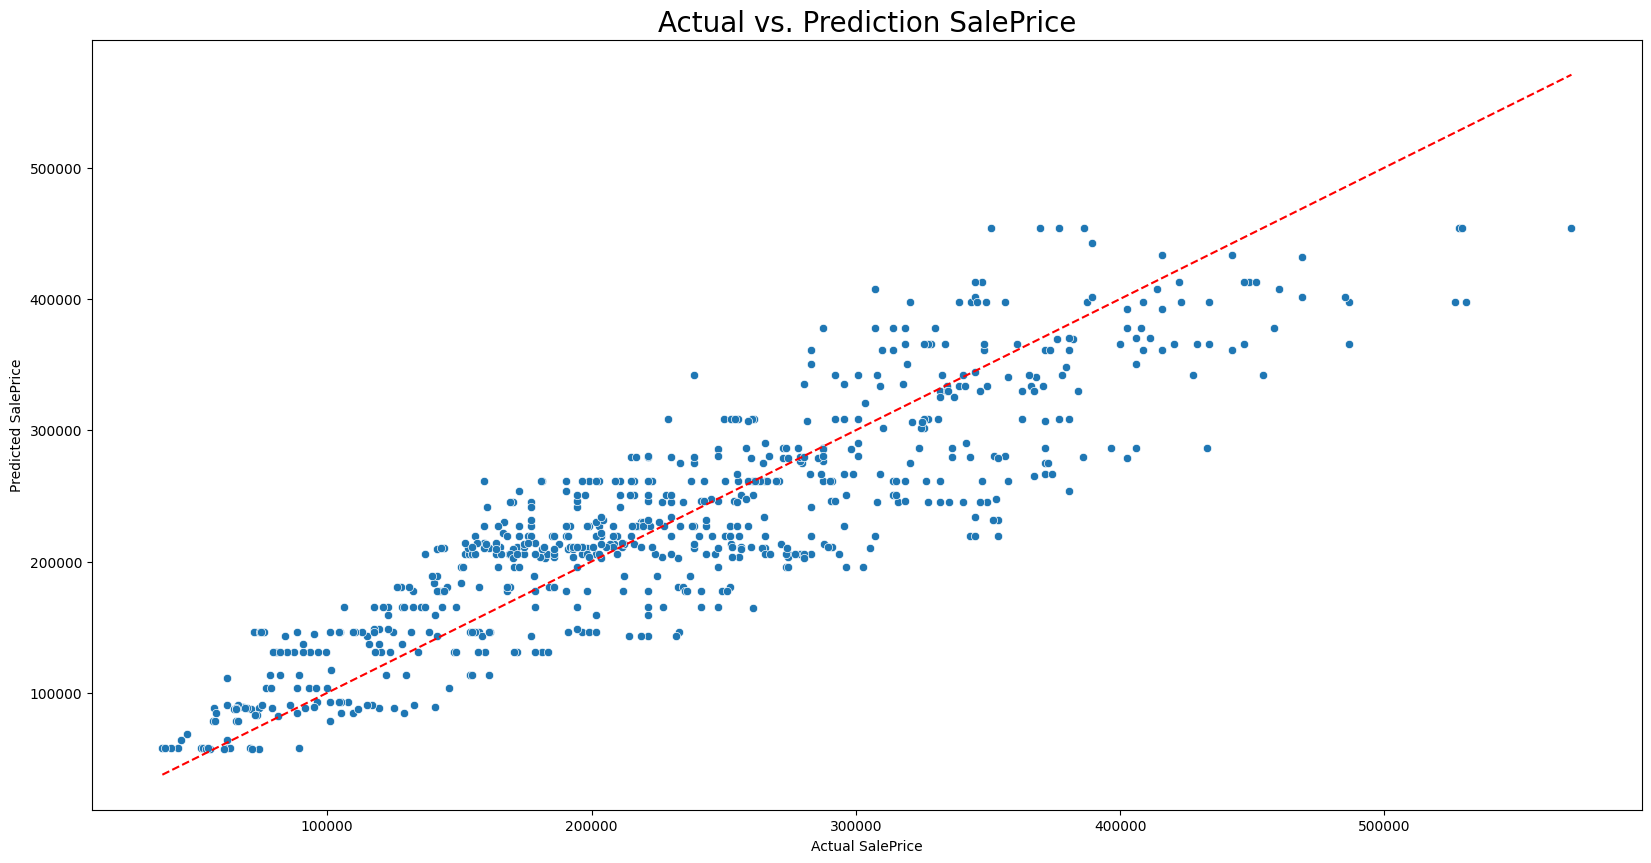

<Figure size 640x480 with 0 Axes>

In [131]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x=y_test, y=y_pred_xgb_tuning)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Actual vs. Prediction SalePrice', size=20)
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.show()
plt.savefig('Scatrerplot Actual vs Predistion Sale Price.jpg')


If the model were perfect, all the points would lie on the diagonal line from the bottom left to the top right. **However, in this graph,** there is variation in the model's predictions. Some points tend to lie along the diagonal line, indicating that the model's predictions are fairly accurate. However, there are also points that are far away from the diagonal line, indicating that the model's predictions are less accurate for those data points.

This graph provides a visual representation of how accurately the XGBoost model performs in predicting the SalePrice values after tuning. The closer the points are to the diagonal line, the more accurate the model's predictions.

**Feature Importances**

In [132]:
col_names = transformer.get_feature_names_out()
col_names

array(['robust__N_FacilitiesNearBy(ETC)',
       'robust__N_FacilitiesNearBy(PublicOffice)',
       'robust__N_SchoolNearBy(University)',
       'robust__N_Parkinglot(Basement)', 'robust__YearBuilt',
       'robust__N_FacilitiesInApt', 'robust__Size(sqf)',
       'OneHot__HallwayType_mixed', 'OneHot__HallwayType_terraced',
       'Binary__SubwayStation_0', 'Binary__SubwayStation_1',
       'Binary__SubwayStation_2', 'Binary__SubwayStation_3',
       'pipe_ordinal_scale__TimeToSubway'], dtype=object)

In [133]:
# Menghilangkan awalan hingga "__" dari setiap nama fitur
col_names_remove = np.array([name.split('__', 1)[1] for name in col_names])
col_names_remove

array(['N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)',
       'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)',
       'YearBuilt', 'N_FacilitiesInApt', 'Size(sqf)', 'HallwayType_mixed',
       'HallwayType_terraced', 'SubwayStation_0', 'SubwayStation_1',
       'SubwayStation_2', 'SubwayStation_3', 'TimeToSubway'], dtype='<U32')

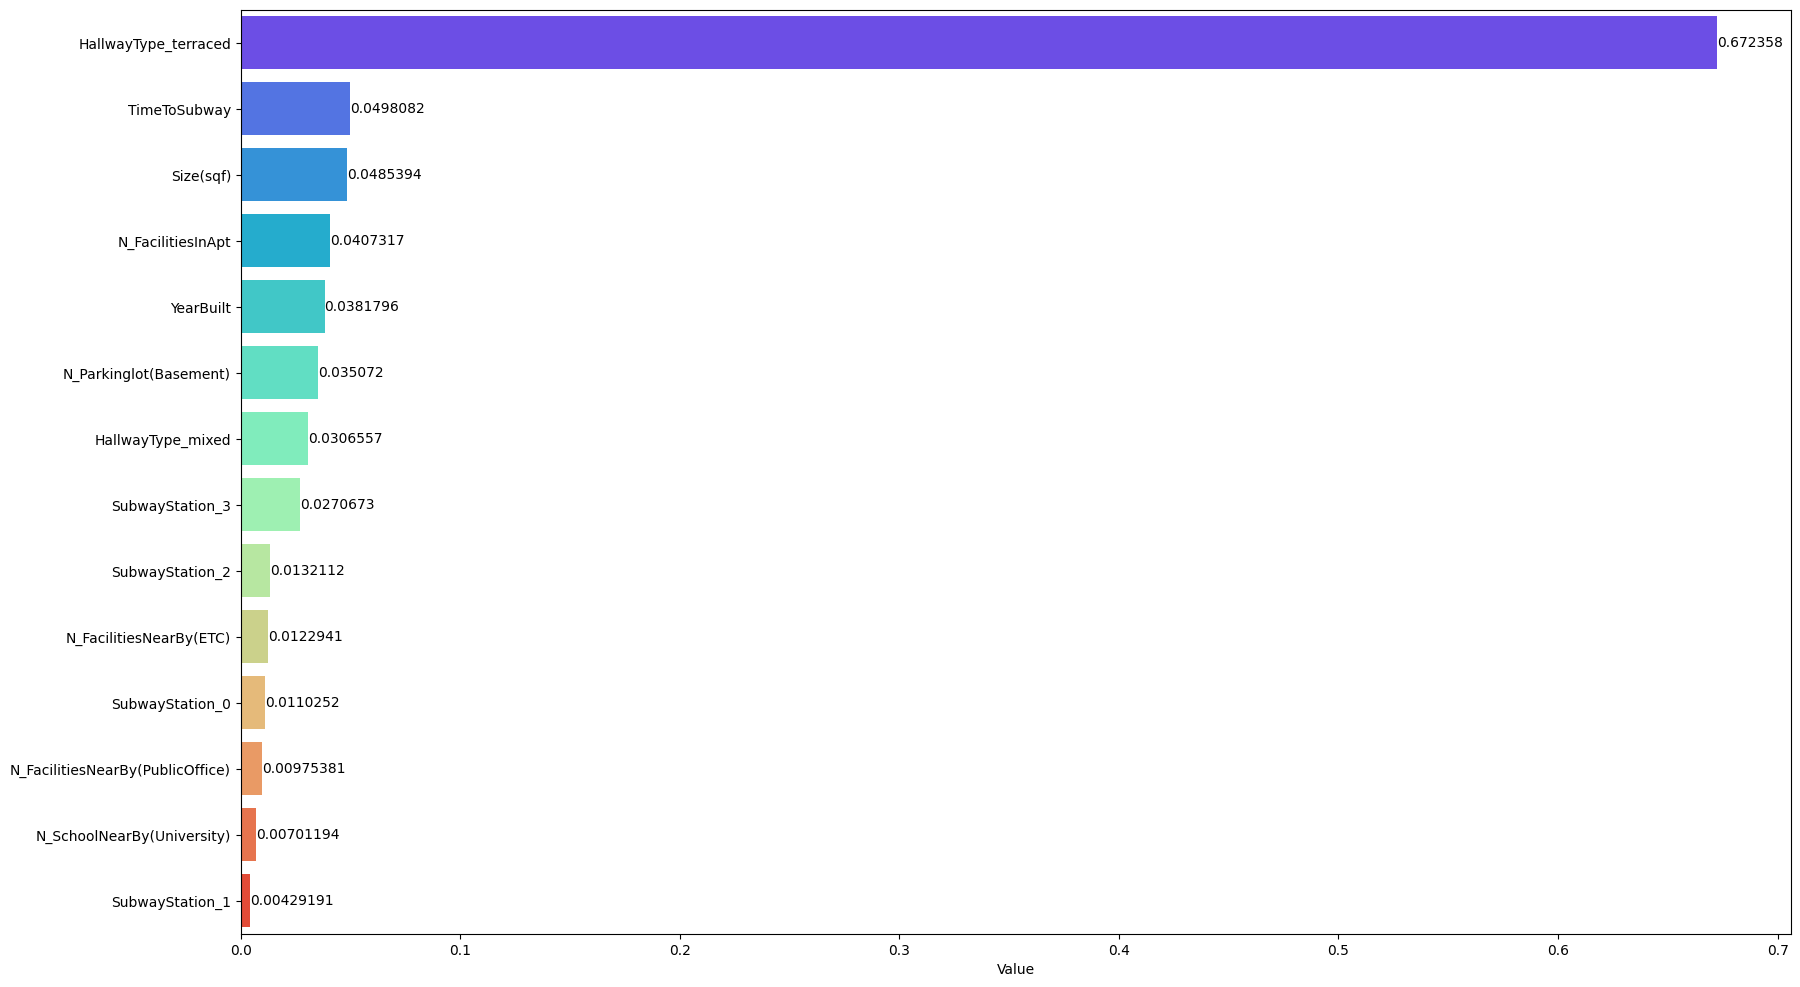

In [134]:
# Plot feature importances
feature_imp = pd.DataFrame(xgb_tuning['model'].feature_importances_, col_names_remove, 
                           columns=['Value']).sort_values(by='Value', ascending=False)

plt.figure(figsize=(20,12))
ax = sns.barplot(data=feature_imp, x='Value', y=feature_imp.index, palette='rainbow')
for i in ax.containers:
    ax.bar_label(i,)
plt.savefig('Feature Importance.jpg')

Based on the Feature Importance with XGBoost plot above, `Hallway Type` is a feature that significantly influences the selling price of the apartment. The second is `Time to subway` and the third is `Size(sqf)`.

In [135]:
# dataframe baru yang bersumber dari dataframe df
df_compare = X_test.copy()
df_compare['SalePrice'] = y_test

# Dataset yang terdiri dari kolom luas apartment, Tipe Hallway dan harga apartment aktual
df_compare[['HallwayType','YearBuilt','Size(sqf)','SalePrice']].head()

,HallwayType,YearBuilt,Size(sqf),SalePrice
2927,terraced,2007,1643,433778
1427,terraced,2006,1149,356637
2081,mixed,2005,914,201769
352,terraced,2007,1419,371681
1861,mixed,1997,914,119469


In [136]:
# Harga Prediksi menggunakan model
df_compare['Predict'] = (xgb_tuning.predict(X_test)).round()

# Selisih harga antara harga aktual dengan harga prediksi
df_compare['Difference'] = abs(df_compare['Predict']- df_compare['SalePrice'])

# Persentase selisih
df_compare['Price Percentage Different (%)'] = (((df_compare['Difference'] / df_compare['SalePrice']) * 100))

# Harga aktual, Harga prediksi, Selisih harga, dan Persentase selisih
df_compare[['HallwayType', 'YearBuilt', 'Size(sqf)', 'SalePrice', 'Predict', 'Difference', 'Price Percentage Different (%)']].head()


,HallwayType,YearBuilt,Size(sqf),SalePrice,Predict,Difference,Price Percentage Different (%)
2927,terraced,2007,1643,433778,397334.0,36444.0,8.401533
1427,terraced,2006,1149,356637,280134.0,76503.0,21.451224
2081,mixed,2005,914,201769,206034.0,4265.0,2.113803
352,terraced,2007,1419,371681,274990.0,96691.0,26.014512
1861,mixed,1997,914,119469,137163.0,17694.0,14.810537


In [137]:
df_compare['Price Percentage Different (%)'].describe()

count    676.000000
mean      19.149888
std       15.192771
min        0.020665
25%        7.328473
50%       16.984748
75%       27.255848
max      102.701506
Name: Price Percentage Different (%), dtype: float64

<Axes: xlabel='Price Percentage Different (%)', ylabel='Count'>

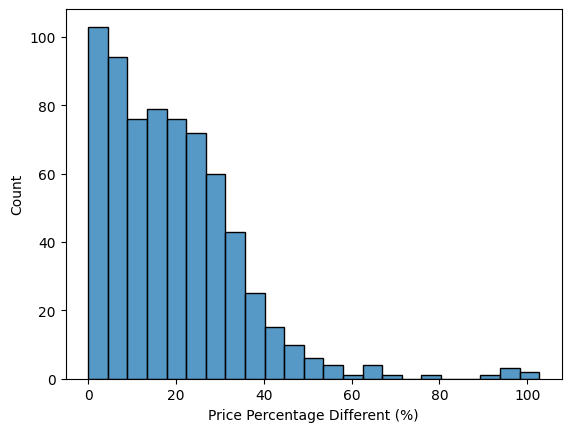

In [138]:

# Assuming you have a DataFrame called df_compare
sns.histplot(df_compare['Price Percentage Different (%)'])


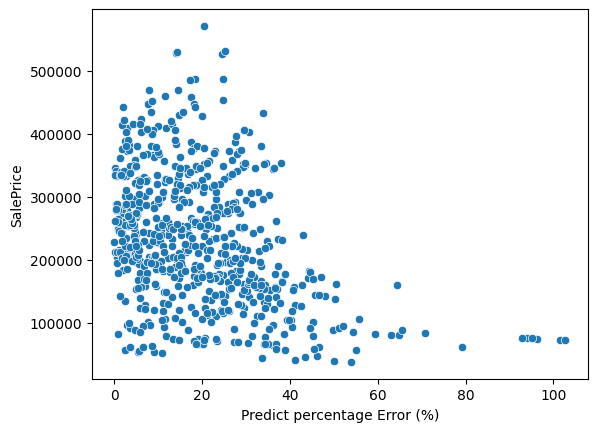

In [151]:
sns.scatterplot(data= df_compare, y='SalePrice',x='Price Percentage Different (%)')
plt.xlabel('Predict percentage Error (%)')
plt.savefig('Error between Actual VS Predit.jpg')

From scatterplot above, we can see The smaller the sale price, the higher the potential for errors. This leads to a wider range of predicted prices, both upper and lower limits, when the sale price is small.

In [140]:
df_compare[(df_compare['Price Percentage Different (%)']>60) & (df_compare['Price Percentage Different (%)']<70)].sort_values('Price Percentage Different (%)',ascending=True)

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice,Predict,Difference,Price Percentage Different (%)
2036,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,644,80530,131219.0,50689.0,62.944244
2991,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,868,159292,261683.0,102391.0,64.278809
1131,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,644,79646,131219.0,51573.0,64.752781
3412,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,572,88495,146464.0,57969.0,65.505396


If we check the error from 60 to 70 %, we can see that SalePrice have wide range of different SalePrice values indicates that the errors alone cannot fully explain the variability in SalePrice. There are other factors (`Feature Importance`) influencing the range of Predict / SalePrice values, and the errors do not directly represent the magnitude of SalePrice.

In [141]:
len(df_compare[df_compare['Price Percentage Different (%)']<30])/len(df_compare)

0.8121301775147929

From the comparison above, the difference between the actual price and the predicted price is still quite significant. For example if 30% error is a maximum thresshold for error, so arround 18% data that is not controlled.

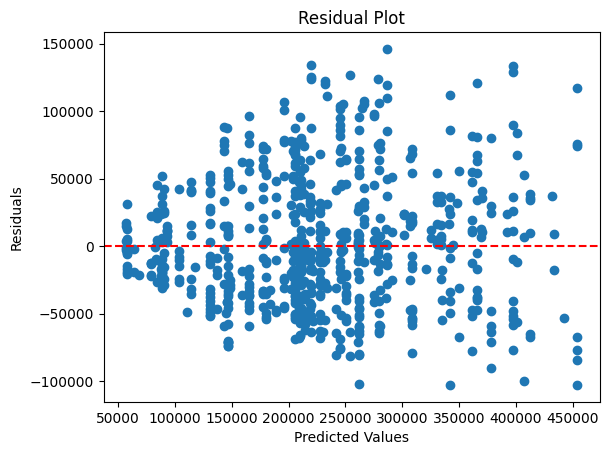

In [142]:
# Import library
import matplotlib.pyplot as plt

# Hitung residual
residuals = y_test - y_pred_xgb_tuning

# Plot residual plot
plt.scatter(y_pred_xgb_tuning, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

We can observe that as the sale price increases, the error also tends to decrease.

In [145]:
df.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504


In [149]:
df['SubwayStation'].nunique()

8

# **Conclusion**

- Based on the modeling that has been done, the features HallwayType_Terraced, YearBuilt, and Size(sqf) are the most influential features on SalePrice. However, it does not mean that other features do not have an impact on the target variable.

- The evaluation metric used for the model is MAE (Mean Absolute Error). Looking at the MAE value produced by the model after hyperparameter tuning using XGBoost, which is 38515.607468, we can conclude that if this model is used to estimate apartment prices in Daegu within the range of values it was trained on (maximum price of USD 585840), the estimated error, as indicated by MAE, is relatively small at 6.5%. However, when compared to the model trained on a minimum price of USD 40,088, the error is significantly large.

- However because MAE represents the average prediction error in the same unit as the target variable, which is the apartment price, So, we cannot simply calculate the predicted price by adding or subtracting the MAE value only from the Sale Price. The prediction of the price involves considering the calculated features and their impact based on the XGBoost model.

- In order to predict the price accurately, we **need to utilize the trained XGBoost model along with the relevant features**. **The model takes into account the importance and influence of each feature on the predicted price**. **By inputting the appropriate feature values into the model, we can obtain a more reliable and accurate prediction of the price**.

- Overall, using the XGBoost model that has undergone the tuning process as the most accurate model for predicting apartment prices in Daegu. This model can provide price estimations with a lower level of error, making it a more reliable tool in supporting business decisions related to determining apartment prices. By relying on this tuned XGBoost model, businesses can make more accurate price estimations and optimize pricing strategies. Due to the efficient and flexible nature of the XGBoost algorithm, property agents in Daegu can predict apartment prices and earn substantial commissions from seller and they can also answer to potential buyer about apartement price with the prediction.

# **Recommendations**

Recommendations for Business are:

- Agent property sales / marketing can use this model for baseline price that depends on the feature in this model. [['Daegu Apartement Price Prediction']](https://rgt88-capstone-3-daegu-apartment-app-caps-4m6wr1.streamlit.app/)

Recommendations for improving the modeling are:

- Add additional features or facilities that can potentially influence the SalePrice, such as the longtitude and latitude to know and plot the area.
- Explore more complex algorithms that can potentially minimize errors deep learning models (e.g., neural networks).

By implementing these recommendations, you can potentially improve the performance of the model and make more accurate predictions for apartment prices in Daegu.

****


#### **Save Model**

In [143]:
# xgb_tuning.predict(X_test.iloc[[0]])

In [144]:
# #Save model
# import pickle

# # estimator = Pipeline([('preprocess', transformer), ('model', XGBRegressor(random_state=42))])
# # estimator.fit(X_train, y_train)

# pickle.dump(xgb_tuning, open('xgboost_model_1.sav', 'wb'))

# #Load model
# filename = 'xgboost_model_1.sav'
# loaded_model = pickle.load(open(filename, 'rb'))
# np.sqrt(mean_absolute_error(y_test, loaded_model.predict(X_test)))